# Redução de Dimensionalidade Aplicada a Base MNIST

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense
from keras.utils import np_utils

In [5]:
(prev_train, class_train), (prev_test, class_test) = mnist.load_data()
prev_train.shape

(60000, 28, 28)

### Normalizando os valores entre 0 e 1

In [6]:
prev_train = prev_train.astype("float32") / 255
prev_test = prev_test.astype("float32") / 255

In [32]:
print(prev_train.shape, prev_test.shape)
print(class_train.shape, class_test.shape)

(60000, 784) (10000, 784)
(60000,) (10000,)


## codificando as classes para o tipo dummy

In [33]:
class_dummy_train = np_utils.to_categorical(class_train)
class_dummy_test = np_utils.to_categorical(class_test)

In [34]:
print(class_dummy_train.shape, class_dummy_test.shape)

(60000, 10) (10000, 10)


### Usando o reshape para modificar a estrutura da base de dados

In [12]:
prev_train = prev_train.reshape((len(prev_train), np.prod(prev_train.shape[1:])))
prev_train.shape

(60000, 784)

In [13]:
prev_test = prev_test.reshape((len(prev_test), np.prod(prev_test.shape[1:])))
prev_test.shape

(10000, 784)

# Criando o Autoencoder da base de dados e aplicando algorítimo de classificação

Para a entrada vamos usar os 784 pixels que foram calculados
na camada oculta vamos colocar 32 neurónios e na camada de saida vamos colocar os mesmo 784 pixels que foram
colocados na camada de entrada do modelo de Autoencoder.

fator de compactação

784 / 32 = 24.5

In [14]:
autoencoder = Sequential()

# Camada de entrada com a quantidades de neurónio da camada oculta
autoencoder.add(Dense(units = 32, activation = "relu", input_dim = 784))

# Camada de saída de rede
autoencoder.add(Dense(units = 784, activation = "sigmoid"))

autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compilando o modelo
autoencoder.compile(optimizer = "adamax", loss='mse')

In [16]:
# Fazendo o Encoder e o Decoder e aplicando a validação cam a base de teste
autoencoder.fit(prev_train, prev_train,
                epochs = 50,
                shuffle=True,
                batch_size = 256,
                validation_data = (prev_test, prev_test))


Epoch 1/50
235/235 [==============================] - 7s 19ms/step - loss: 0.1242 - val_loss: 0.0576
Epoch 2/50
235/235 [==============================] - 4s 18ms/step - loss: 0.0534 - val_loss: 0.0432
Epoch 3/50
235/235 [==============================] - 5s 20ms/step - loss: 0.0417 - val_loss: 0.0365
Epoch 4/50
235/235 [==============================] - 5s 23ms/step - loss: 0.0357 - val_loss: 0.0319
Epoch 5/50
235/235 [==============================] - 6s 24ms/step - loss: 0.0313 - val_loss: 0.0282
Epoch 6/50
235/235 [==============================] - 5s 22ms/step - loss: 0.0278 - val_loss: 0.0253
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0250 - val_loss: 0.0228
Epoch 8/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0225 - val_loss: 0.0205
Epoch 9/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0204 - val_loss: 0.0186
Epoch 10/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0185 - val_lo

# Criando o codificador de imagens

In [17]:
dimensao_original = Input(shape = (784, ))

In [18]:
camada_encoder = autoencoder.layers[0]

In [19]:
encoder = Model(dimensao_original, camada_encoder(dimensao_original))
encoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


## Codificando os Previsores Treinamento e Teste

In [27]:
prev_train_code = encoder.predict(prev_train)
prev_test_code = encoder.predict(prev_test)

In [31]:
# Shape da base original de Trainamento e de Teste
print(prev_train.shape, prev_test.shape)

# Shape da base codificade de Trainamento e de Teste
print(prev_train_code.shape, prev_test_code.shape)

(60000, 784) (10000, 784)
(60000, 32) (10000, 32)


### O Objetivo agora é comparar os resultados de um algoritimo de classificação com a base de dados codificada e a base de dados original

# Rede Neural sem a redução de dimensionalidade

In [36]:
classificador_1 = Sequential()
classificador_1.add(Dense(units = 400, activation = "relu", input_dim = 784))
classificador_1.add(Dense(units = 400, activation = "relu"))
classificador_1.add(Dense(units = 10, activation = "softmax"))

classificador_1.compile(optimizer = "adam",
                        loss = "categorical_crossentropy",
                        metrics = ["accuracy"])
classificador_1.fit(prev_train, class_dummy_train,
                    batch_size = 256, epochs = 100,
                   validation_data = (prev_test, class_dummy_test))

Epoch 1/100
235/235 [==============================] - 11s 45ms/step - loss: 0.5348 - accuracy: 0.8531 - val_loss: 0.1257 - val_accuracy: 0.9612
Epoch 2/100
235/235 [==============================] - 10s 44ms/step - loss: 0.1089 - accuracy: 0.9676 - val_loss: 0.0884 - val_accuracy: 0.9715
Epoch 3/100
235/235 [==============================] - 8s 33ms/step - loss: 0.0641 - accuracy: 0.9806 - val_loss: 0.0727 - val_accuracy: 0.9776
Epoch 4/100
235/235 [==============================] - 7s 28ms/step - loss: 0.0460 - accuracy: 0.9859 - val_loss: 0.0653 - val_accuracy: 0.9803
Epoch 5/100
235/235 [==============================] - 6s 27ms/step - loss: 0.0301 - accuracy: 0.9909 - val_loss: 0.0698 - val_accuracy: 0.9796
Epoch 6/100
235/235 [==============================] - 5s 23ms/step - loss: 0.0225 - accuracy: 0.9931 - val_loss: 0.0753 - val_accuracy: 0.9770
Epoch 7/100
235/235 [==============================] - 5s 23ms/step - loss: 0.0174 - accuracy: 0.9952 - val_loss: 0.0660 - val_accurac

235/235 [==============================] - 4s 19ms/step - loss: 2.4961e-06 - accuracy: 1.0000 - val_loss: 0.1018 - val_accuracy: 0.9857
Epoch 58/100
235/235 [==============================] - 4s 19ms/step - loss: 2.2609e-06 - accuracy: 1.0000 - val_loss: 0.1024 - val_accuracy: 0.9857
Epoch 59/100
235/235 [==============================] - 4s 19ms/step - loss: 2.0022e-06 - accuracy: 1.0000 - val_loss: 0.1031 - val_accuracy: 0.9858
Epoch 60/100
235/235 [==============================] - 4s 19ms/step - loss: 1.6816e-06 - accuracy: 1.0000 - val_loss: 0.1036 - val_accuracy: 0.9858
Epoch 61/100
235/235 [==============================] - 5s 19ms/step - loss: 1.6226e-06 - accuracy: 1.0000 - val_loss: 0.1042 - val_accuracy: 0.9858
Epoch 62/100
235/235 [==============================] - 4s 19ms/step - loss: 1.3916e-06 - accuracy: 1.0000 - val_loss: 0.1048 - val_accuracy: 0.9857
Epoch 63/100
235/235 [==============================] - 5s 19ms/step - loss: 1.2912e-06 - accuracy: 1.0000 - val_loss: 

# Rede Neural com a redução de dimensionalidade

In [ ]:
classificador_2 = Sequential()
classificador_2.add(Dense(units = 21, activation = "relu", input_dim = 32))
classificador_2.add(Dense(units = 21, activation = "relu"))
classificador_2.add(Dense(units = 10, activation = "softmax"))

classificador_2.compile(optimizer = "adam",
                        loss = "categorical_crossentropy",
                        metrics = ["accuracy"])
classificador_2.fit(prev_train_code, class_dummy_train,
                    batch_size = 256, epochs = 100,
                   validation_data = (prev_test_code, class_dummy_test))

Epoch 1/100
235/235 [==============================] - 4s 10ms/step - loss: 3.3925 - accuracy: 0.2008 - val_loss: 1.0572 - val_accuracy: 0.6453
Epoch 2/100
235/235 [==============================] - 2s 7ms/step - loss: 0.9082 - accuracy: 0.7032 - val_loss: 0.5840 - val_accuracy: 0.8102
Epoch 3/100
235/235 [==============================] - 2s 7ms/step - loss: 0.5535 - accuracy: 0.8282 - val_loss: 0.4539 - val_accuracy: 0.8623
Epoch 4/100
235/235 [==============================] - 2s 7ms/step - loss: 0.4512 - accuracy: 0.8657 - val_loss: 0.3955 - val_accuracy: 0.8828
Epoch 5/100
235/235 [==============================] - 2s 7ms/step - loss: 0.4024 - accuracy: 0.8809 - val_loss: 0.3570 - val_accuracy: 0.8925
Epoch 6/100
235/235 [==============================] - 2s 7ms/step - loss: 0.3668 - accuracy: 0.8932 - val_loss: 0.3339 - val_accuracy: 0.9009
Epoch 7/100
235/235 [==============================] - 2s 7ms/step - loss: 0.3402 - accuracy: 0.8994 - val_loss: 0.3173 - val_accuracy: 0.906

Epoch 58/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1551 - accuracy: 0.9540 - val_loss: 0.1540 - val_accuracy: 0.9531
Epoch 59/100
235/235 [==============================] - 2s 6ms/step - loss: 0.1457 - accuracy: 0.9565 - val_loss: 0.1465 - val_accuracy: 0.9559
Epoch 60/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1495 - accuracy: 0.9544 - val_loss: 0.1627 - val_accuracy: 0.9521
Epoch 61/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1527 - accuracy: 0.9541 - val_loss: 0.1538 - val_accuracy: 0.9562
Epoch 62/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1466 - accuracy: 0.9569 - val_loss: 0.1487 - val_accuracy: 0.9561
Epoch 63/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1471 - accuracy: 0.9562 - val_loss: 0.1473 - val_accuracy: 0.9577
Epoch 64/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1501 - accuracy: 0.9549 - val_loss: 0.1455 - val_accuracy:

## Codificando imagens de 784 para 32

In [24]:
imagens_code = encoder.predict(prev_test)

In [25]:
imagens_code.shape

(10000, 32)

## Decodificando imagens de 32 para 784

In [26]:
# Esse método faz o encoder e depois aplicao decode
imagens_decode = autoencoder.predict(prev_test)

## Visualizando os resultados

In [27]:
num_imagens = 10

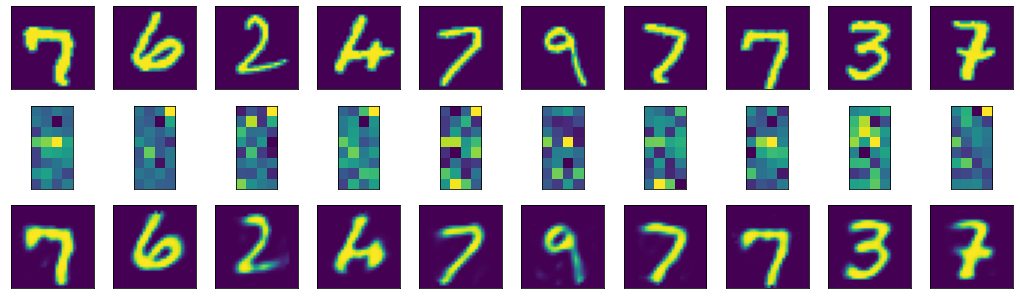

In [30]:
# Selecionando 10 imagens aleatórias da base de dados de teste
imagens_test = np.random.randint(prev_test.shape[0], size = num_imagens)

# Plotando as imagens
plt.figure(figsize = (18, 18))

for i, indice_img in enumerate(imagens_test):
    
    # Gráfico 01, plotar a imagem Original
    eixo = plt.subplot(10, 10, i + 1)
    plt.imshow(prev_test[indice_img].reshape(28, 28))
    plt.xticks(())
    plt.yticks(())
    
     # Gráfico 02, plotar a imagem codificada
    eixo = plt.subplot(10, 10, i + 1 + num_imagens)
    plt.imshow(imagens_code[indice_img].reshape(8, 4))
    plt.xticks(())
    plt.yticks(())
    
    # Gráfico 03, plotar a imagem Decodificada
    eixo = plt.subplot(10, 10, i + 1 + num_imagens * 2)
    plt.imshow(imagens_decode[indice_img].reshape(28, 28))
    plt.xticks(())
    plt.yticks(())